In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [67]:
df = pd.read_csv('/content/student_lifestyle_dataset..csv')
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,1,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,2,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,3,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,4,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,5,8.1,0.6,6.5,2.2,6.6,High,Male,8.78


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
 7   Gender                           2000 non-null   object 
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


In [69]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Grades
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,7.789825
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.746777
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,5.600000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,7.250000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,7.780000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,8.320000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,10.000000


In [70]:
df.isna().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
Stress_Level,0
Gender,0
Grades,0


In [71]:
df['Stress_Level'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [72]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

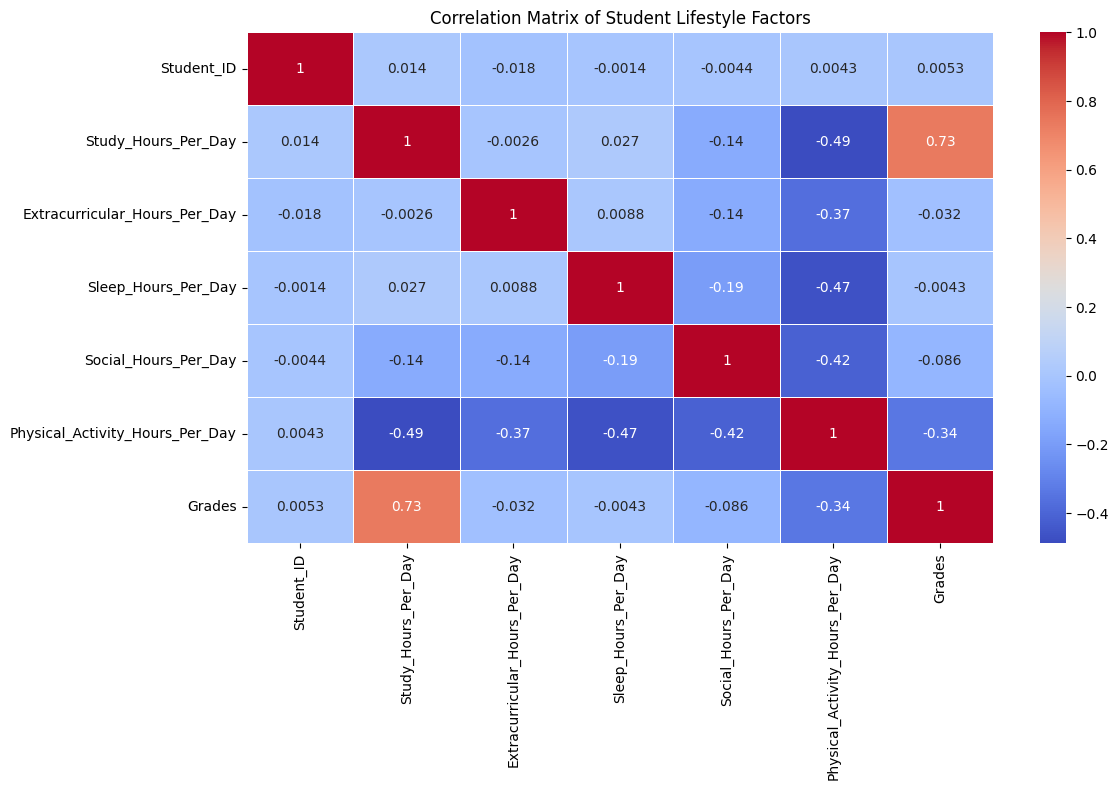

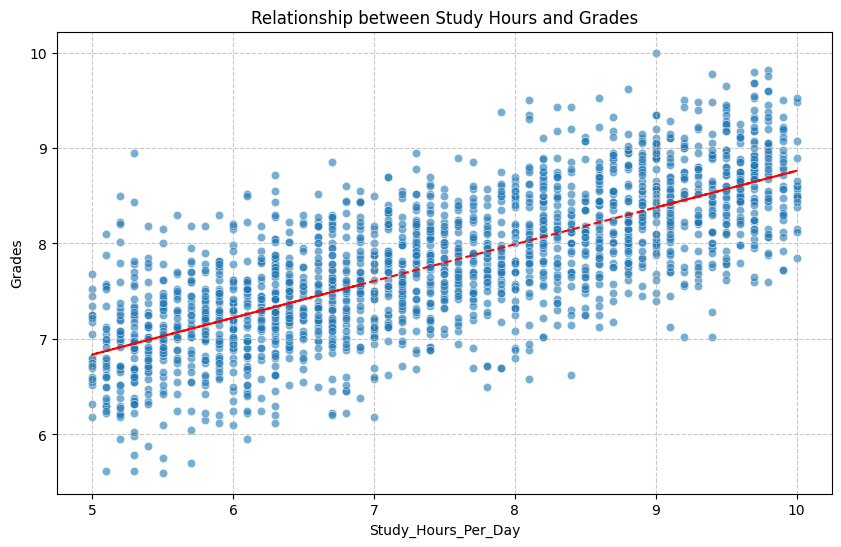

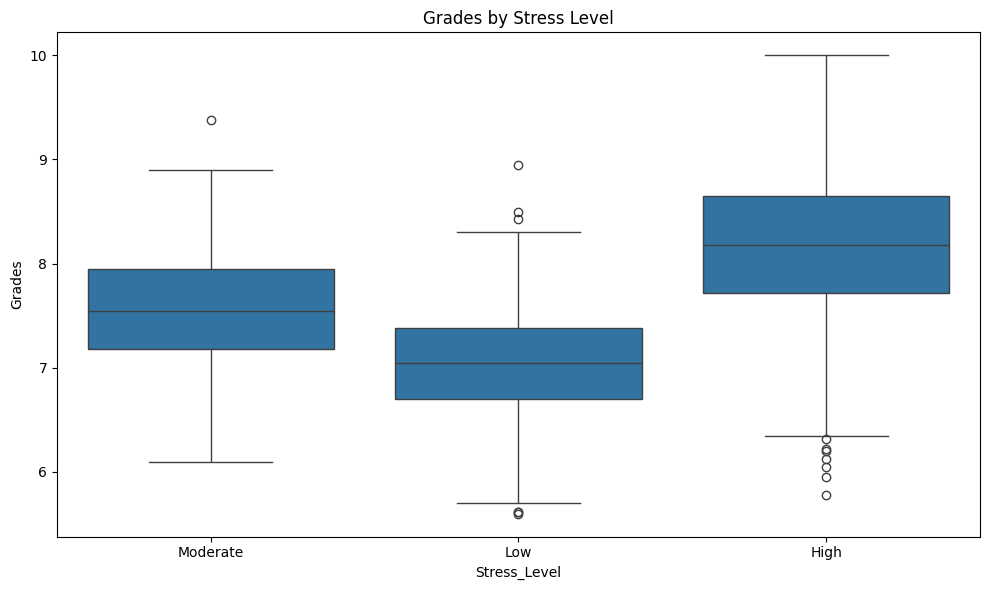

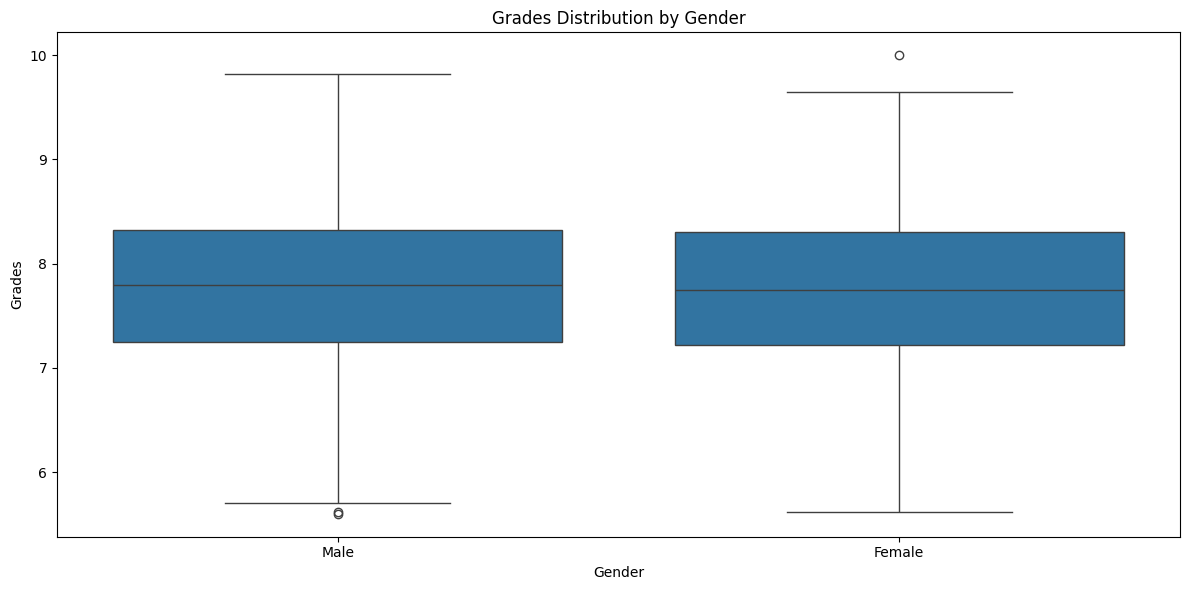

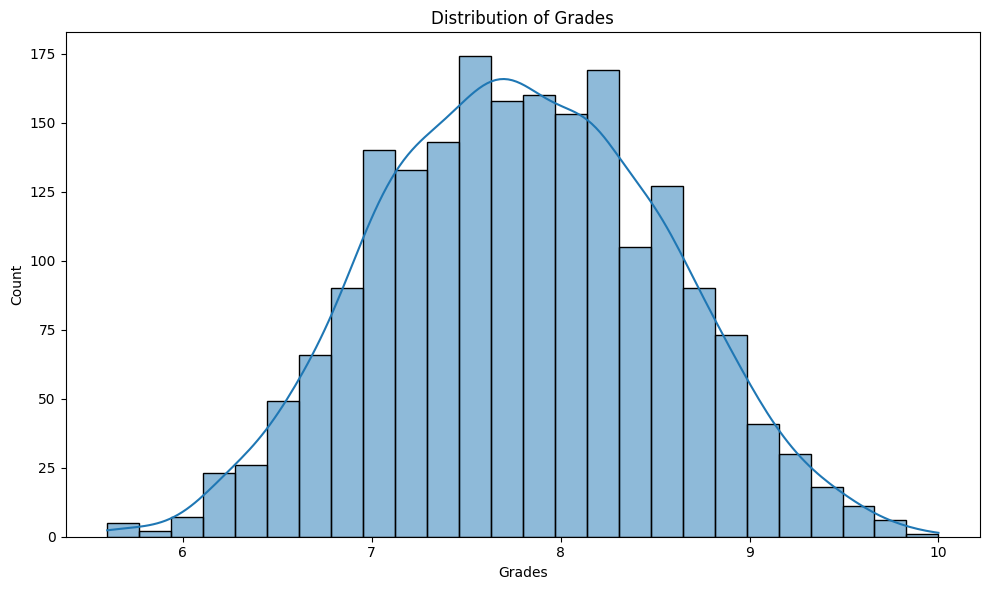

In [73]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Student Lifestyle Factors')
plt.tight_layout()
plt.show()

# Relationship between Study Hours and Grades
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours_Per_Day', y='Grades', data=df, alpha=0.6)
plt.title('Relationship between Study Hours and Grades')
plt.grid(True, linestyle='--', alpha=0.7)
z = np.polyfit(df['Study_Hours_Per_Day'], df['Grades'], 1)
p = np.poly1d(z)
plt.plot(df['Study_Hours_Per_Day'], p(df['Study_Hours_Per_Day']), "r--")
plt.show()

# Relationship between Stress Level and Grades
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Grades', data=df)
plt.title('Grades by Stress Level')
plt.tight_layout()
plt.show()

# Gender-based analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Grades', data=df)
plt.title('Grades Distribution by Gender')
plt.tight_layout()
plt.show()
# Distribution of Grades
plt.figure(figsize=(10, 6))
sns.histplot(df['Grades'], kde=True)
plt.title('Distribution of Grades')
plt.tight_layout()
plt.show()

# Feature Engineering

In [74]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Stress_Level']=le.fit_transform(df['Stress_Level'])

In [75]:
from sklearn.model_selection import train_test_split  # Correct import path

X = df.drop('Grades', axis=1)
y = df['Grades']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pr=lr.predict(X_test)
r2=r2_score(y_test,lr_pr)
mse=mean_squared_error(y_test,lr_pr)
mae=mean_absolute_error(y_test,lr_pr)
print('r2 score:',r2)
print('mse:',mse)
print('mae:',mae)

r2 score: 0.5459606189470035
mse: 0.26509731473106235
mae: 0.4120986173738866


**Random Forest Regressor**

In [77]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=300,max_depth=3,random_state=42)
rfr.fit(X_train,y_train)
rfr_pr=rfr.predict(X_test)
r2=r2_score(y_test,rfr_pr)
mse=mean_squared_error(y_test,rfr_pr)
mae=mean_absolute_error(y_test,rfr_pr)
print('r2 score:',r2)
print('mse:',mse)
print('mae:',mae)



r2 score: 0.5370468158365937
mse: 0.270301764757249
mae: 0.4158498180635311


**Decision Tree**

In [78]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(max_depth=3,random_state=42)
dtr.fit(X_train,y_train)
dtr_pr=dtr.predict(X_test)
r2=r2_score(y_test,dtr_pr)
mse=mean_squared_error(y_test,dtr_pr)
mae=mean_absolute_error(y_test,dtr_pr)
print('r2 score:',r2)
print('mse:',mse)
print('mae:',mae)

r2 score: 0.5344643919000198
mse: 0.27180954949939024
mae: 0.4178006626497839


**Average Time Allocation of Students**


Average Grades by Stress Level:
Stress_Level
0    8.154840
2    7.562047
1    7.042088
Name: Grades, dtype: float64

Average Study Hours by Gender:
Gender
0    7.425203
1    7.524803
Name: Study_Hours_Per_Day, dtype: float64


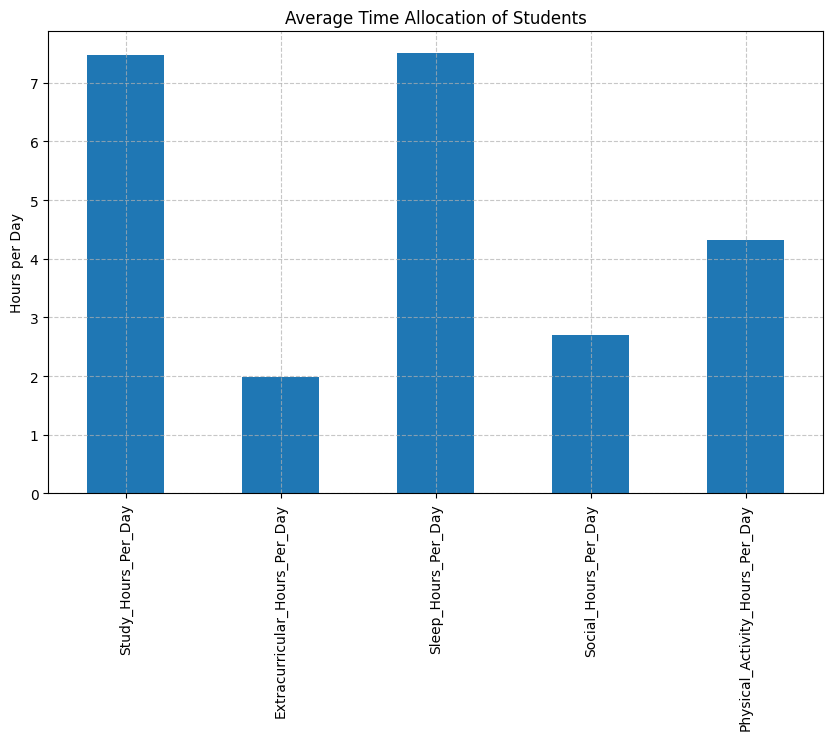

In [79]:
print("\nAverage Grades by Stress Level:")
print(df.groupby('Stress_Level')['Grades'].mean().sort_values(ascending=False))

print("\nAverage Study Hours by Gender:")
print(df.groupby('Gender')['Study_Hours_Per_Day'].mean())

# Time allocation analysis
time_columns = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day',
                'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']
avg_time = df[time_columns].mean()

plt.figure(figsize=(10, 6))
avg_time.plot(kind='bar')
plt.title('Average Time Allocation of Students')
plt.ylabel('Hours per Day')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Study Efficiency vs. Study Hours**

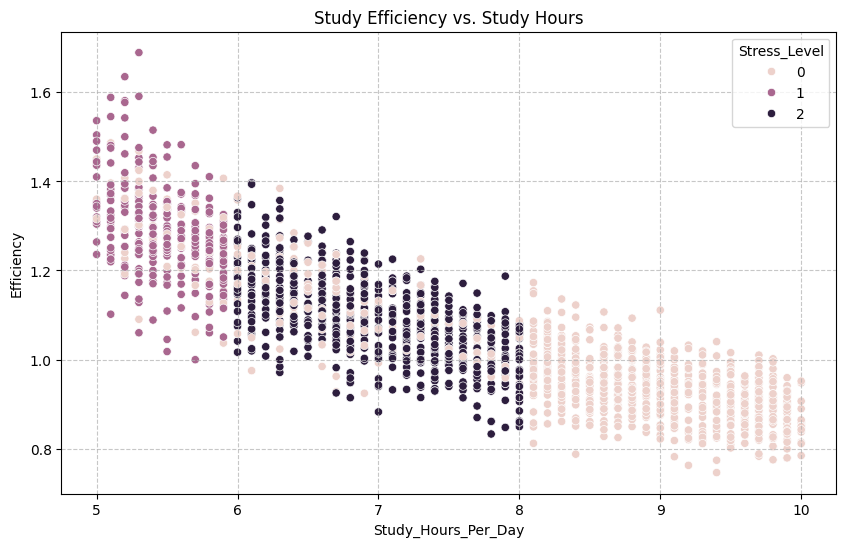

In [80]:
# Calculate efficiency (Grades per study hour)
df['Efficiency'] = df['Grades'] / df['Study_Hours_Per_Day']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study_Hours_Per_Day', y='Efficiency', hue='Stress_Level', data=df)
plt.title('Study Efficiency vs. Study Hours')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Grades vs. Total Daily Activity Hours**

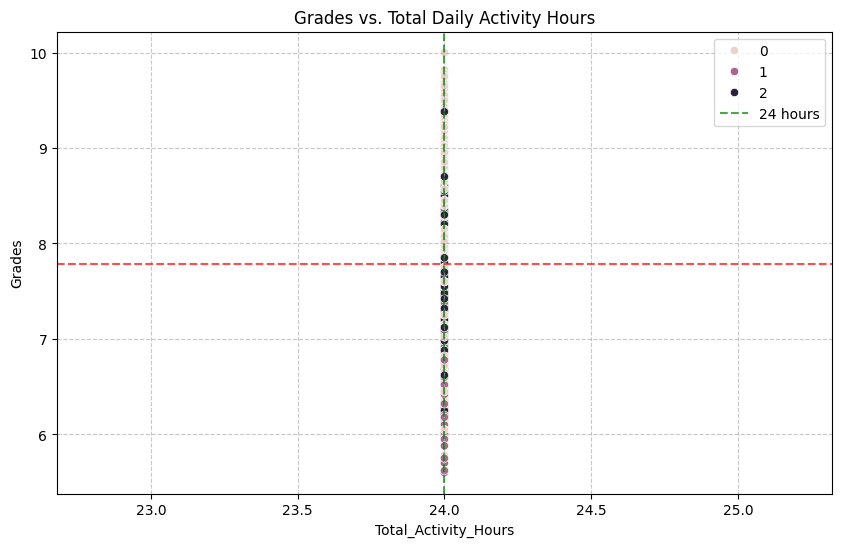

In [81]:
df['Total_Activity_Hours'] = df[time_columns].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Activity_Hours', y='Grades', hue='Stress_Level', data=df)
plt.title('Grades vs. Total Daily Activity Hours')
plt.axhline(y=df['Grades'].mean(), color='r', linestyle='--', alpha=0.7)
plt.axvline(x=24, color='g', linestyle='--', alpha=0.7, label='24 hours')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Hierarchical Clustering

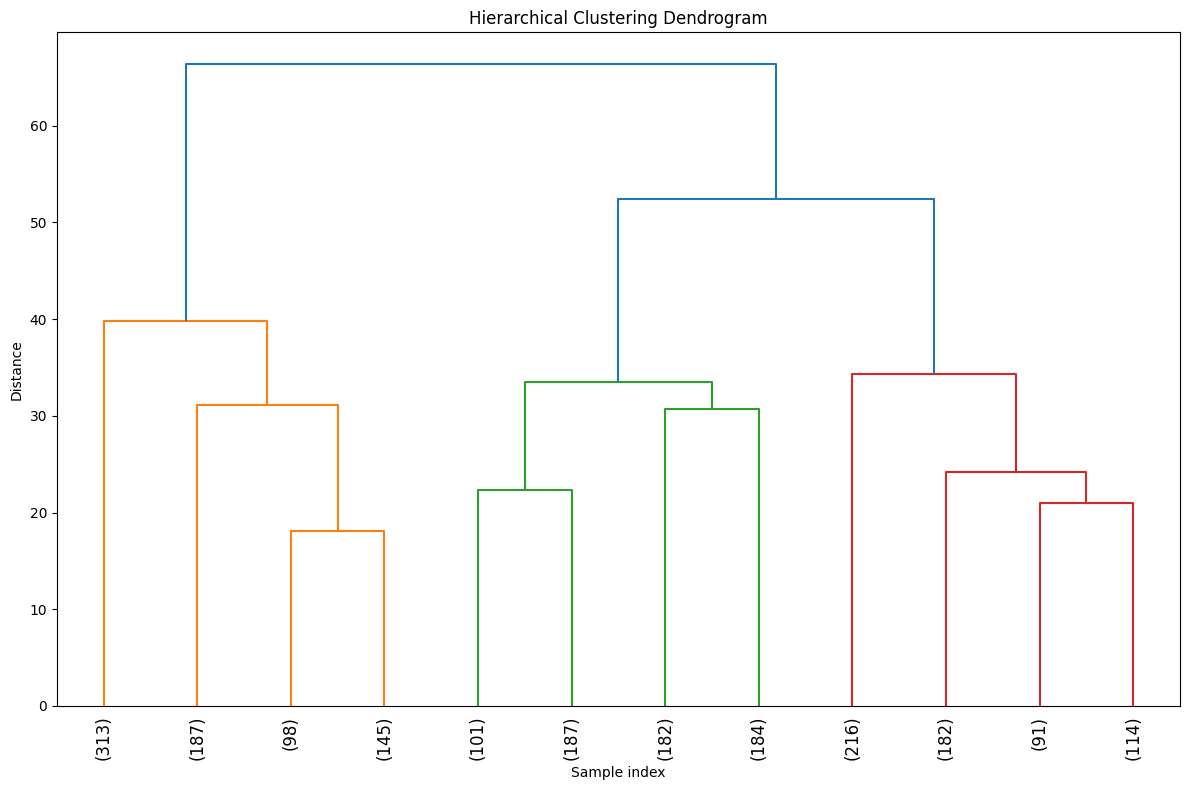

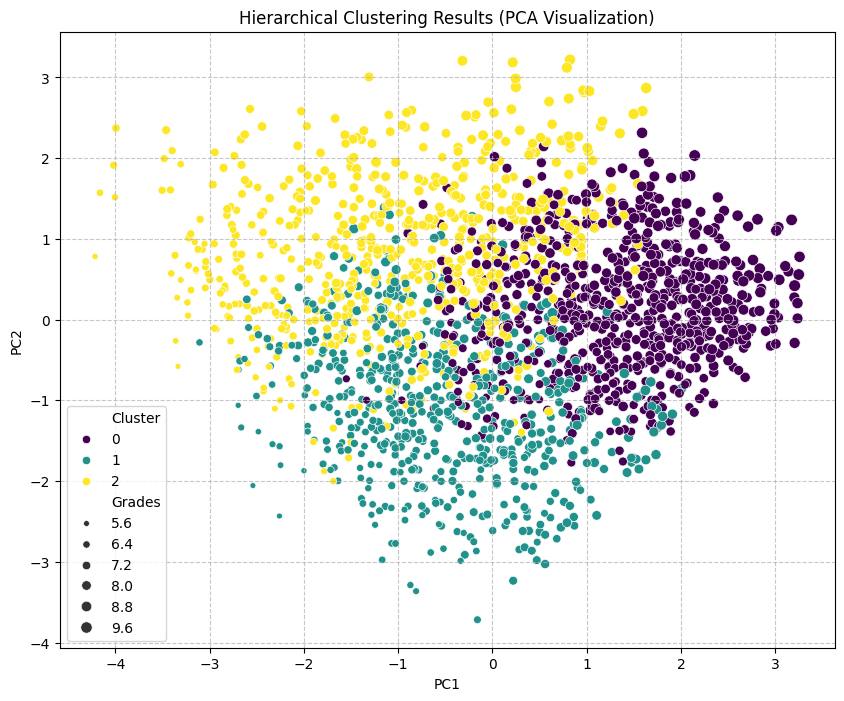

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage


# Select features for clustering
features = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day',
           'Extracurricular_Hours_Per_Day', 'Social_Hours_Per_Day',
           'Physical_Activity_Hours_Per_Day', 'Grades']

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_features, columns=features)

Z = linkage(scaled_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig('hierarchical_clustering_dendrogram.png')

# Apply Hierarchical Clustering
n_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Hierarchical_Cluster']
pca_df['Grades'] = df['Grades']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', size='Grades', data=pca_df, palette='viridis')
plt.title('Hierarchical Clustering Results (PCA Visualization)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
